## Introdução :


Com o intuito de criar um algoritmo que simule uma MTND(Máquina de Turing Não Determinística ),este que mesmo possuindo o não determinismo em sua composição não tem seu poder computacional mais elevado que uma MT(Máquina de Turing padrão).O que difere dos APND anteriormente estudados que com a aplicação do não determinismo aumentavam seu poder computacional.Contudo agora, podemos reconhecer linguagens antes não reconhecidas pelos AF/AP,isso é possível, graças a fita(que anteriormente era chamada de pilha) que foi modificada para agora movimentar-se tanto para frente quanto para trás.


## Projeto e Implementação do Algoritmo :


O corpo principal do algoritmo utiliza a estrutura de dados de uma pilha para gerenciar o que é processado.Assim nesta pilha é colocado as próximas iterações ao percorrer a MTND,sendo adicionado a essa pilha cada configuração instantânea a ser processada.Fazendo uso da tupla, os seguintes dados são adicionado à pilha:Estado Atual,Estado atual da Fita,index atual da fita.


Desta forma podemos gerenciar o não determinismo, pois a cada novo caminho encontrado, um novo processo é adicionado na pilha com suas novas configurações para serem consumidas.Por conseguinte, o primeiro processo que conseguir chegar às condições de parada(estado final e não possuir mais transições possíveis) faz com que todo o resto pare de ser processado,evitando assim processamento desnecessário.


Para representar a MTND foram utilizados Grafo e Tabela Hash, onde a representação do grafo foi realizada por matriz de adjacências.Foram salvos as configurações instantâneas para cada estado da MTND,de forma que dado o estado atual e o caractere atual da palavra, podemos obter facilmente os próximos caminhos disponíveis.


## Metodologia :


Para o desenvolvimento desse projeto a metodologia utilizada foi o TDD(Test Driven Development).Assim, primeiramente criamos os testes com alguns MTND e seus resultados esperados e partimos para a implementação do algoritmo.


O código em primeiro momento foi baseado no APND feito anteriormente, contudo com alguns testes,algumas refatorações foram feitas,tornando o código atual uma versão distinta da que foi baseada.


Nossa estrutura de testes foi baseada em testes unitários, fazendo uso da biblioteca já presente no python(unittest).Tornando nossos testes reutilizáveis, podendo ser aplicados a qualquer algoritmo que simule um MTND,sendo necessário poucas modificações para uso.


Visto a necessidade de manter as modificações do projeto controladas foi utilizado o sistema de versionamento git.Assim, sendo hospedado no Github,uma das maiores plataformas de hospedagem de código-fonte,para ser possível sua utilização por futuros estudantes.


## Resultados e Conclusões :


Iremos realizar um testes empírico para determinar aproximadamente o tempo de execução do algoritmo que foi criado, para isso iremos utilizar a seguinte linguagem :


L=b*ab*


Onde pára o tamanho n será realizado uma variação de 1 a 1000 para que possamos analisar o comportamento deste, assim:


Faremos a importação de algumas funções ja presentes no arquivo index(presente neste [repositório](https://github.com/Paul0Cesar/Theory-Of-Computation/tree/main/MTND)),pois estas funções não vão ser modificadas para a realização do nosso teste.Importamos tambem a biblioteca time,pois está será necessaria para mensurar o tempo de início e fim do processamento de cada palavra,Logo:



In [9]:
from index import Graph, verify_word
import time

Diferente das outras funções, a função start será refeita,pois será necessário coletar o tempo de início e fim de cada palavra, ficando da seguinte maneira:

In [10]:
def start(states, alphabet, tape_alphabet, tape_left_limit, blank_symbol, edges, start_state, end_state_list, words):
    '''start the analysis process using the passed args'''
    graph = Graph(states)
    graph.set_edges(edges)
    result = []
    time_result = []
    for word in words:
        start_time = time.time()
        result.append(verify_word(graph, word, start_state, set(end_state_list), tape_left_limit, blank_symbol))
        end_time = time.time()
        time_result.append(end_time-start_time)
    return result,time_result

Neste próximo passo estamos criando a estrutura de nosso APND, iremos usar 5 palavras inicialmente para validar se o funcionamento está dentro do esperado, assim:

In [11]:
states = ["e1", "e2", "e3", "e4", "e5", "e6"]
alphabet = ["a", "b"]
tape_alphabet = ["a", "b", "c", "*", "<"]
tape_left_limit = "<"
blank_symbol = "*"
edges = [('e1', 'c', 'e1', 'c', 'D'), ('e1', 'b', 'e1', 'b', 'D'), ('e1', 'a', 'e2', 'b', 'D'), ('e2', 'b', 'e2', 'b', 'D'),
                 ('e2', '*', 'e3', '*', 'E'), ('e3', 'b', 'e3', 'b','E'), ('e3', '<', 'e6', '<', 'D')]
start_state = "e1"
end_state_list = ['e6']
words = ['*','bbabb','bbbb','abab','ccacc',"ccccac"]

expected = ["N", "S", "N", "N", "N", "N"]

test1,test_time1 = start(states, alphabet, tape_alphabet, tape_left_limit, blank_symbol, edges,start_state, end_state_list, words)

print("System Calibrated:", test1 == expected)

System Calibrated: True


Assim, sabemos que nosso MTND está funcionando como deveria.Por conseguinte iremos criar um loop para criar as palavras com variados tamanhos de n,onde usaremos a seguinte expressão para o tamanho da palavra (2*n+1),logo:

In [12]:
words = []
word_sizes = []
for n in range(1, 1000):
    word = ''.join("b" for i in range(n))+'a'+''.join("b" for i in range(n))
    words.append(word)
    word_sizes.append(2*n+1)

test2, test_time= start(states, alphabet, tape_alphabet, tape_left_limit, blank_symbol, edges,start_state, end_state_list, words)

Em posse dos resultados, iremos agora usar a biblioteca matplotlib para plotar um gráfico do tamanho de n em relação ao tempo de processamento, assim:

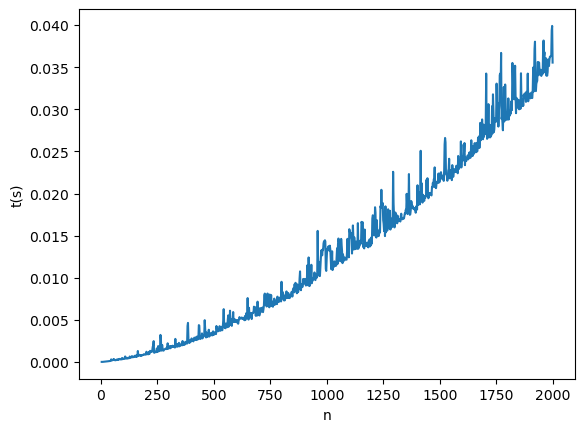

In [13]:
import matplotlib.pyplot as plt

plt.xlabel('n')
plt.ylabel('t(s)')
plt.plot(word_sizes, test_time)

Podemos observar no gráfico que dado o aumento de n o tempo tambem vem a aumentar.Com o objetivo de prever o tempo de processamento para qualquer palavra de tamanho n,faremos a seguir uma regressão linear utilizando a biblioteca scikit-learn,assim:

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


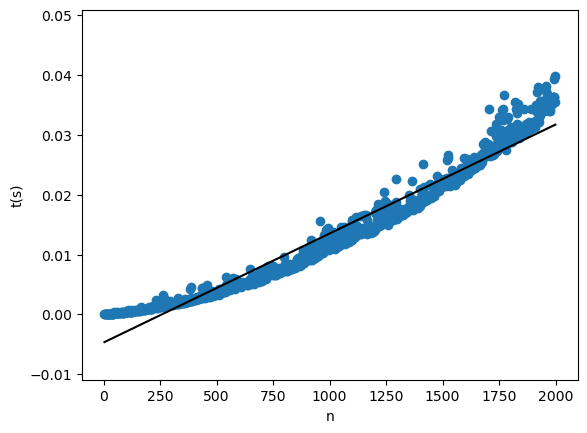

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
x=np.array(list(zip(word_sizes)))
y=np.array(test_time)
model.fit(x,y)

plt.xlabel('n')
plt.ylabel('t(s)')
plt.scatter(x, test_time)
plt.plot(x, model.predict(x),color="black")

Sabemos que uma reta tem sua equação geral dada por :f(x)=Ax+C , assim coletando os dados obtidos na regressão temos:

In [16]:
a=model.coef_[0]
c=model.intercept_
print("A:",a)
print("C:",c)
f = lambda n : a*n + c
print("f(1000001)=",f(1000001),"s")

A: 1.819064381747206e-05
C: -0.004670193920648182
f(1000001)= 18.185991814195226 s


Assim, como feito no código anterior,se tivéssemos uma palavra com n com valor de 1000001 teríamos um tempo aproximado de 18 segundos de processamento.Este valor não é absoluto, pois pode mudar de acordo com as configurações do computador onde o algoritmo for executado.